In [ ]:
#!pip install opendatasets

# **1. Data Downloading and Loading**

**1.0 Import requred dependencies and libraries.**

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import opendatasets
import os
import warnings
warnings.filterwarnings('ignore')
import pickle
import joblib
sns.set()

In [44]:
import sklearn
print(sklearn.__version__)

1.2.2


**Downloading dataset from kaggle using opendatasets**

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos'
opendatasets.download(dataset_url)
#{"username":"your_kaggle_username","key"api_key"}

**Loading dataset to Pandas DatsFrame**

In [4]:
def csv_to_dataframe(csv_file:str)-> pd.DataFrame:
  file_extension = os.path.splitext(csv_file)[1]

  file_name = os.path.basename(csv_file)
  print(f'File name: {file_name}')
  print(f'File extention: {file_extension}')

  if file_extension != '.csv':
    raise ValueError(f'File: {file_name} is not csv file')
  
  try:
    df = pd.read_csv(csv_file)
    print(f'File: {file_name} have been successfully loaded\n')
    return df
  except FileNotFoundError as e:
    raise FileNotFoundError(f'file: {file_name} with path: {csv_file} is not found. {e}')
  
  except pd.errors.ParserError as e:
    raise ValueError(f'Error while parsing csv file:{file_name}. {e}')


In [5]:
calories_csv_path = '/content/fmendesdat263xdemos/calories.csv'
exercise_csv_path = '/content/fmendesdat263xdemos/exercise.csv'
calories_dataframe = csv_to_dataframe(calories_csv_path)
exercise_dataframe = csv_to_dataframe(exercise_csv_path)

File name: calories.csv
File extention: .csv
File: calories.csv have been successfully loaded

File name: exercise.csv
File extention: .csv
File: exercise.csv have been successfully loaded



In [6]:
# Top five rows 
calories_dataframe.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
# Top five rows 
exercise_dataframe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
#add Calories column to exercise dataframe
exercise_dataframe['Calories'] = calories_dataframe['Calories']
exercise_dataframe.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


#**2. Descriptive Analysis**

In [ ]:
#shape of the dataframe
exercise_dataframe.shape

(15000, 9)

In [ ]:
#size of the dataframe
exercise_dataframe.size

135000

In [ ]:
#columns in the dataframe
exercise_dataframe.columns.tolist()

['User_ID',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [ ]:
#information about the dataframe
exercise_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#data types of the dataframe
exercise_dataframe.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [ ]:
# statistical information about numerical columns
exercise_dataframe.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
#categorical column statistics
exercise_dataframe.describe(include = 'object')

,Gender
count,15000
unique,2
top,female
freq,7553


#**3. Data Visualization**

**Checking misssing Values**

In [ ]:
exercise_dataframe.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Drop unnecessary columnns**

In [9]:
exercise_dataframe.drop('User_ID',axis=1,inplace = True)

In [10]:
numerical_columns =list(exercise_dataframe.select_dtypes(['int64','float64']).columns)
numerical_columns


['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [11]:
# visualizing numerical columns using boxplot,violinplot,histogram,kde,
def make_plot(df:pd.DataFrame,plot_kind:str, numerical_columns:list):
  
  if df.empty:
    raise ValueError(f'This dataframe is empty.')

  plot_func = {
      'violinplot':sns.violinplot,
      'boxplot':sns.boxplot,
      'kde':sns.kdeplot,
      'hist': plt.hist
  }

  if plot_kind not in plot_func.keys():
    raise ValueError(f'{plot_kind} is invalid plotting function \n consider using: {list(plot_func.keys())}')

  if not isinstance(numerical_columns,list):
    raise TypeError(f'Must be a list containng the names of columns')


  fig = plt.figure(figsize=(15,10))
  for index,column in enumerate(numerical_columns):

    axis = fig.add_subplot(3,3,index+1)
    if plot_kind not in ['hist','kde']:
      plot_func[plot_kind](y=df[column],ax=axis)
      plt.title(f'{plot_kind} plot for {column}')
    else:
      plot_func[plot_kind](df[column])
      plt.title(f'{plot_kind} plot for {column}')
  plt.tight_layout()
  plt.show()


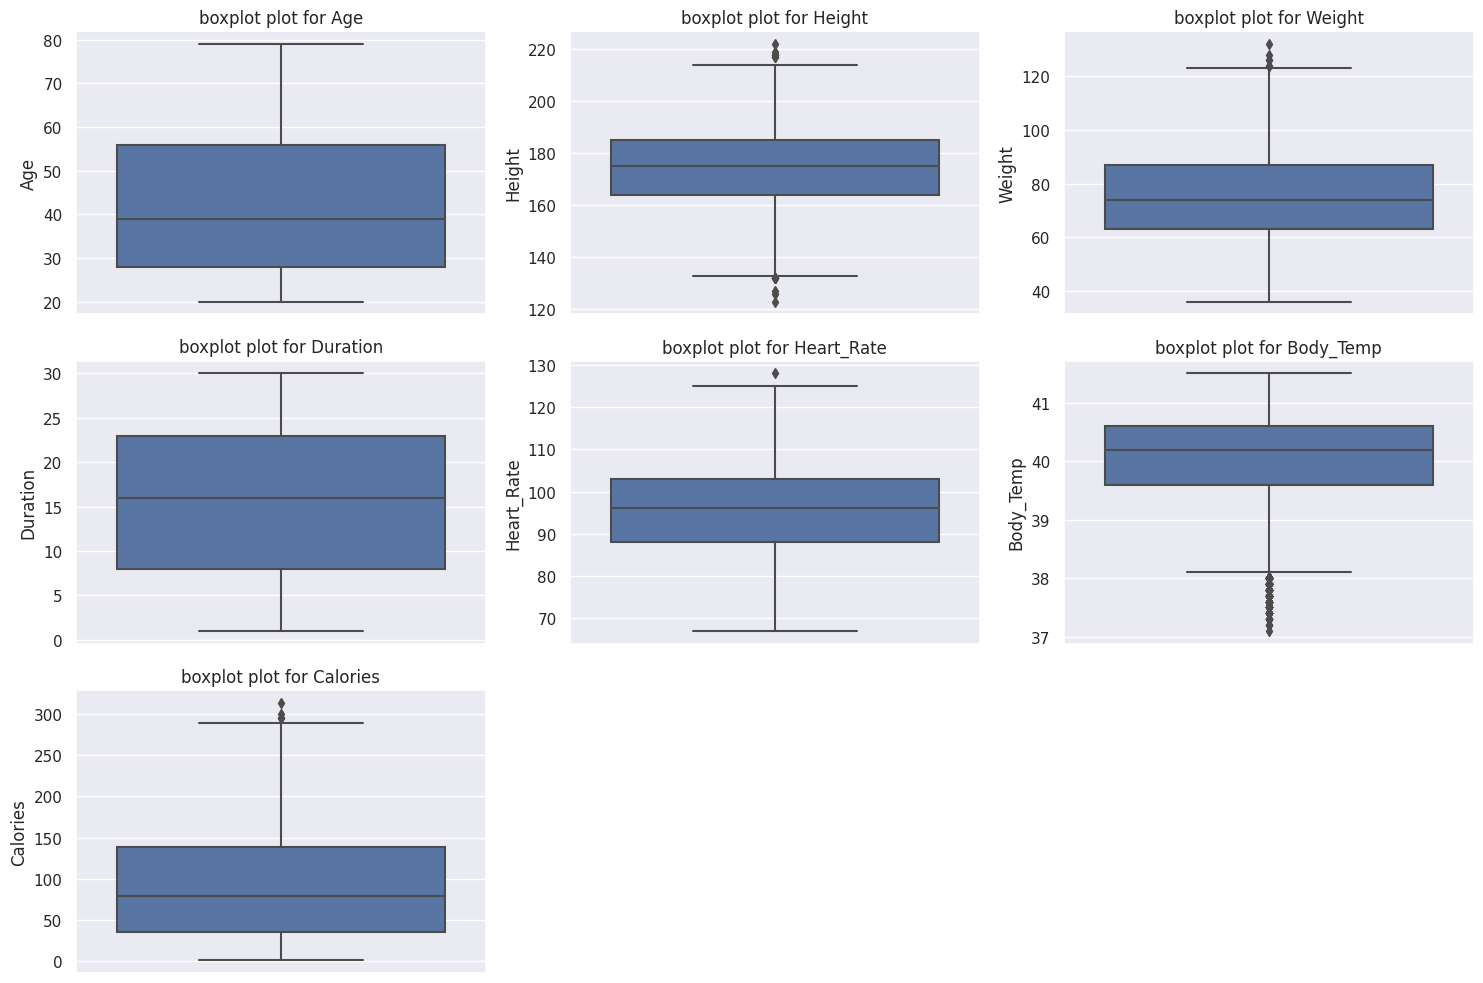

In [ ]:
#boxplot
make_plot(exercise_dataframe,'boxplot',numerical_columns)

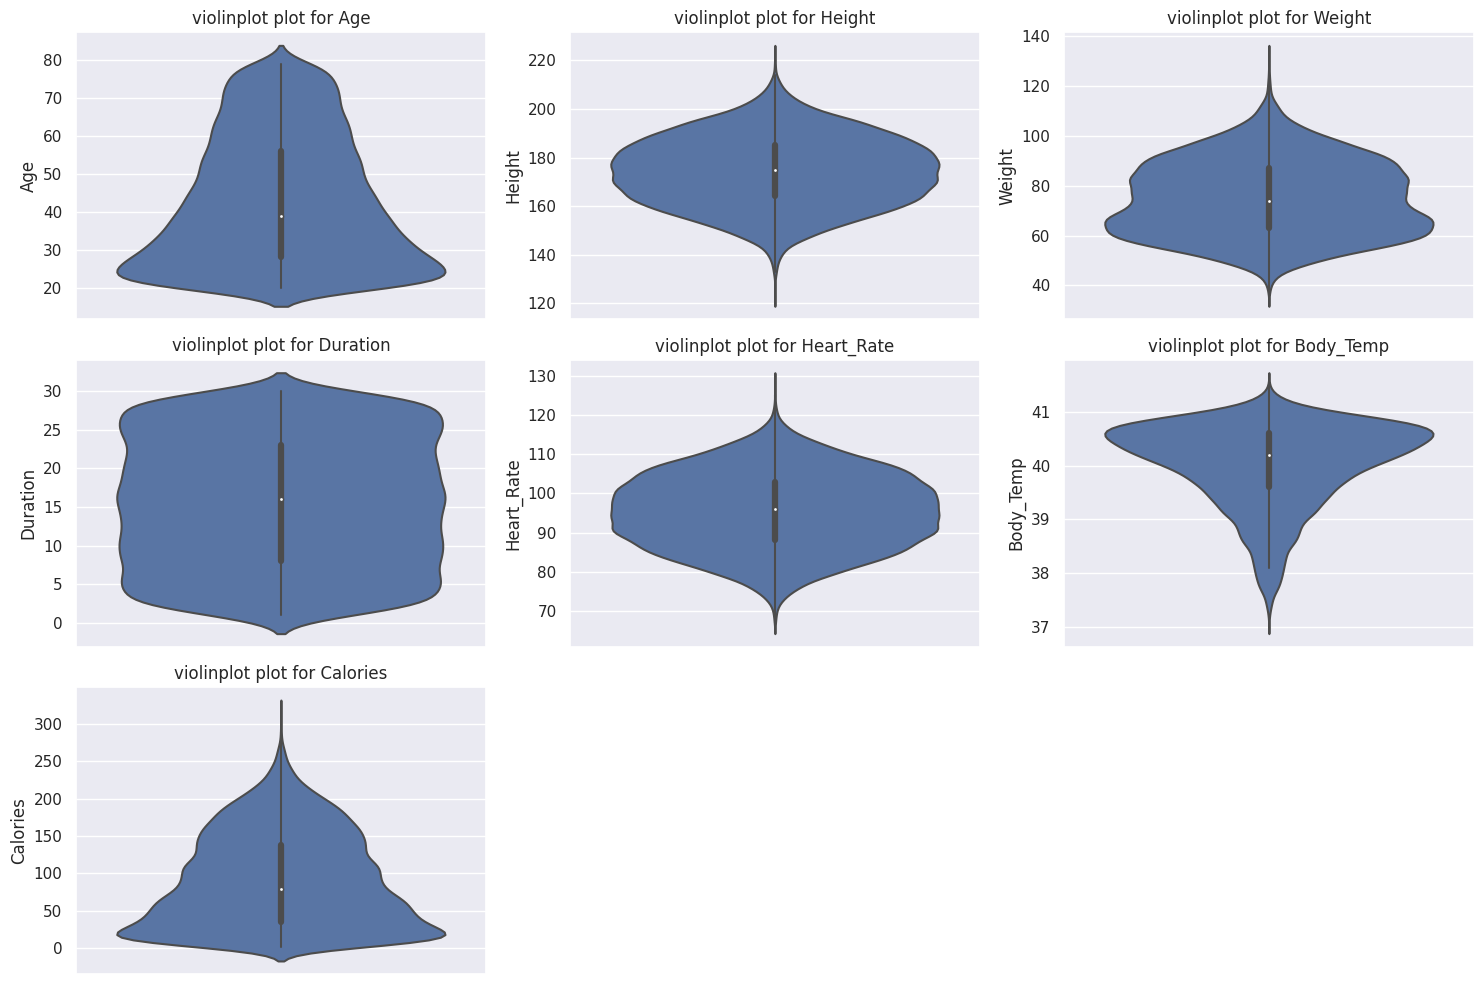

In [ ]:
#violinplot
make_plot(exercise_dataframe,'violinplot',numerical_columns)

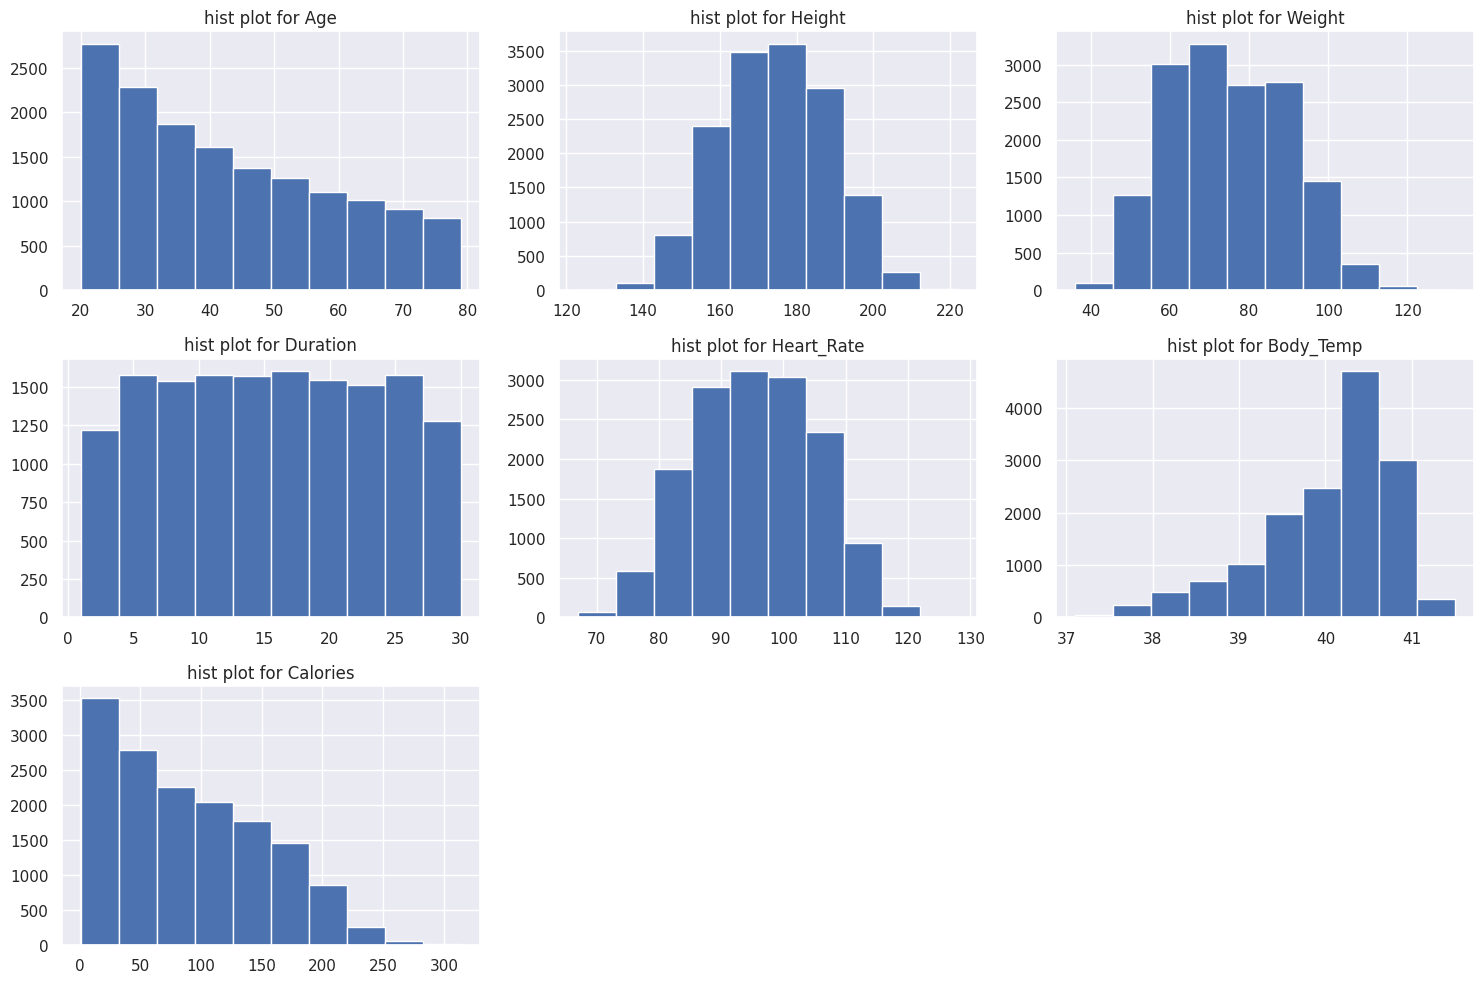

In [ ]:
#barplot
make_plot(exercise_dataframe,'hist',numerical_columns)

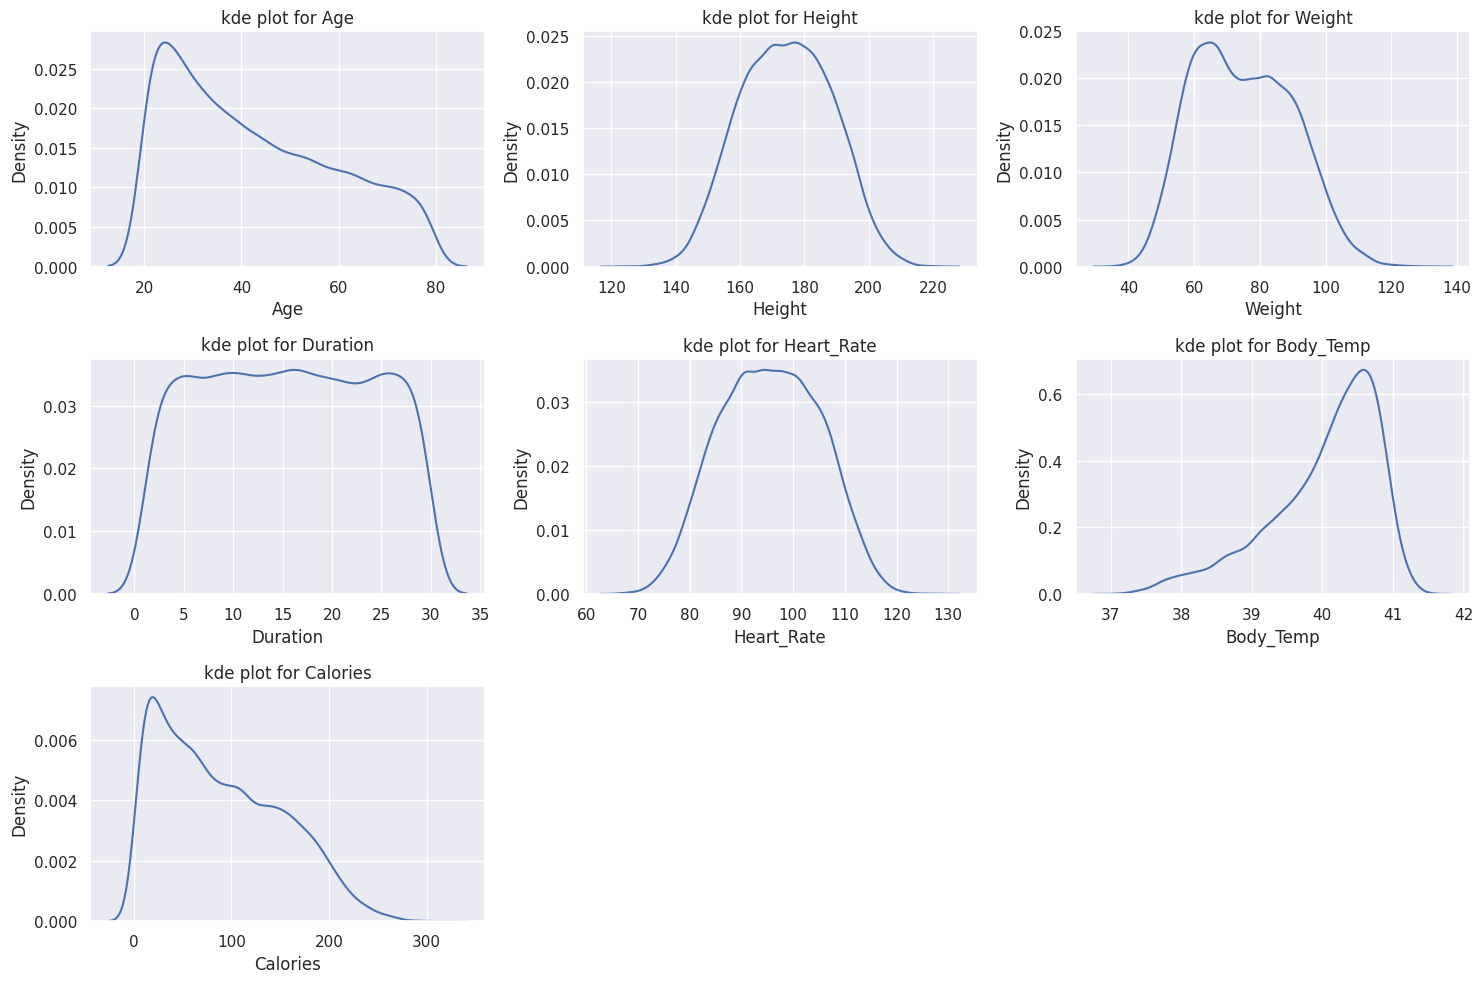

In [ ]:
#kde plot
make_plot(exercise_dataframe,'kde',numerical_columns)

**Visualizing Gender column**

In [12]:
gender = exercise_dataframe.Gender.value_counts()
gender

female    7553
male      7447
Name: Gender, dtype: int64

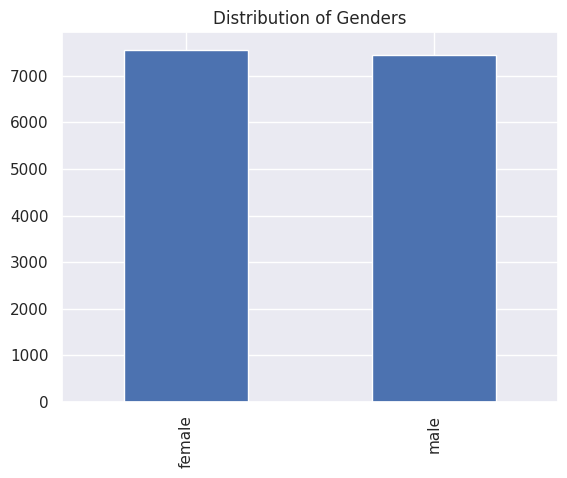

In [ ]:
gender.plot(kind = 'bar')
plt.title('Distribution of Genders')
plt.show()

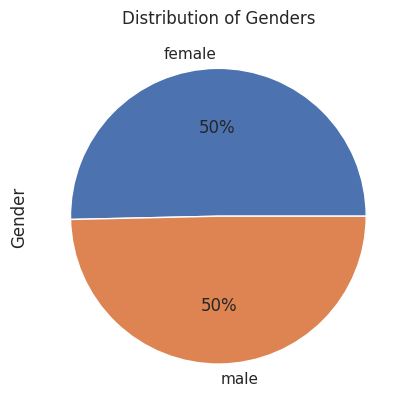

In [ ]:
gender.plot(kind = 'pie',autopct = '%.f%%')
plt.title('Distribution of Genders')
plt.show()

**Correlation matrix**

In [13]:
correlation = exercise_dataframe.corr()
correlation

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


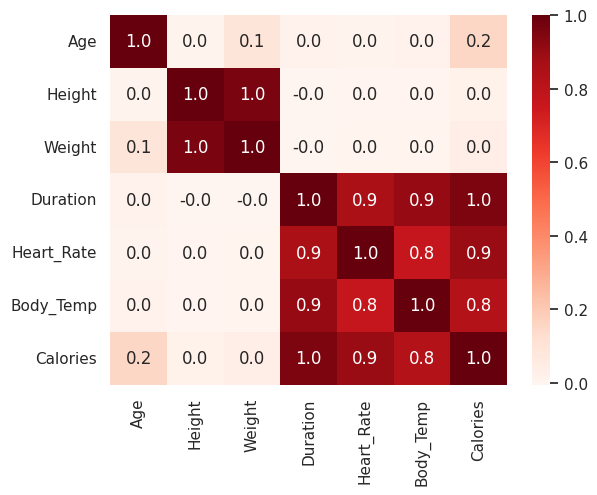

In [ ]:
sns.heatmap(correlation,annot=True,fmt='.1f',cmap = 'Reds')
plt.show()

**Feature Engineering**

**Calculate BMI**

In [14]:
def calculate_BMI(dataframe: pd.DataFrame) ->pd.DataFrame:
  height_weight_tuple = ('Height','Weight')
  
  if not all(column in dataframe.columns for column in height_weight_tuple):
    raise ValueError("Missing 'Height' and 'Weight' column in dataframe")
  
  dataframe['BMI'] = dataframe['Weight']/((dataframe['Height']/100)**2)
  return dataframe
  

calculate_BMI(exercise_dataframe)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063
...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,23.087868
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,23.875115
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,22.942130
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,26.040968


**BMI Index Category**

In [15]:
def feature_engineer_bmi_category(dataframe:pd.DataFrame,bmi_range:list,bmi_labels:list):
  dataframe['BMI Category'] = pd.cut(dataframe['BMI'],bins=bmi_range,labels=bmi_labels)
  return dataframe

bmi_range = [0,18.5,25,30,40]
bmi_labels = ['Underweight','Normal Weight','Overweight','Obese']
feature_engineer_bmi_category(exercise_dataframe,bmi_range,bmi_labels)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI Category
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Overweight
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Normal Weight
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Normal Weight
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Normal Weight
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Normal Weight
...,...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,23.087868,Normal Weight
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,23.875115,Normal Weight
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,22.942130,Normal Weight
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,26.040968,Overweight


**Age Group**

In [16]:
mycopy = exercise_dataframe.copy()

In [17]:
def feature_engineer_age_category(dataframe:pd.DataFrame,age_range:list,labels:str):
  
  dataframe['Age Group'] = pd.cut(dataframe['Age'],bins=age_ranges,labels=labels)
  return dataframe

age_ranges = [0,14,24,64,100]
labels = ['Children','Youth','Adult','Old']

feature_engineer_age_category(exercise_dataframe,age_ranges,labels)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI Category,Age Group
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Overweight,Old
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Normal Weight,Youth
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Normal Weight,Old
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Normal Weight,Adult
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Normal Weight,Adult
...,...,...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,23.087868,Normal Weight,Youth
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,23.875115,Normal Weight,Adult
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,22.942130,Normal Weight,Adult
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,26.040968,Overweight,Old


**Save final data to csv,excel and json**

In [26]:
exercise_dataframe.to_csv('exercise_df.csv',sep='\t',encoding='utf-8')
exercise_dataframe.to_excel('exercise_df.xlsx',index = False)
exercise_dataframe.to_json('exercise_df.json',indent = 4,orient='records')

**Label Encoding**

In [18]:
def label_encoding(dataframe:pd.DataFrame):

  """
    Encodes the 'Gender' column of the given DataFrame using a LabelEncoder,
    and creates dummy variables for the 'Age Group' and 'BMI Category' columns.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to be encoded.

    Returns:
        pandas.DataFrame: A new DataFrame with the encoded 'Gender' column and
        dummy variables for the 'Age Group' and 'BMI Category' columns.
  """
  encoder = LabelEncoder()
  dataframe['Gender'] = encoder.fit_transform(dataframe['Gender'])
  dataframe = pd.get_dummies(dataframe,columns = ['Age Group','BMI Category'])
  return dataframe 
new_df = label_encoding(exercise_dataframe)
new_df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age Group_Children,Age Group_Youth,Age Group_Adult,Age Group_Old,BMI Category_Underweight,BMI Category_Normal Weight,BMI Category_Overweight,BMI Category_Obese
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,0,0,0,1,0,0,1,0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0,1,0,0,0,1,0,0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,0,0,0,1,0,1,0,0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0,0,1,0,0,1,0,0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0,23.087868,0,1,0,0,0,1,0,0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0,23.875115,0,0,1,0,0,1,0,0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0,22.942130,0,0,1,0,0,1,0,0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0,26.040968,0,0,0,1,0,0,1,0


**Seperating features from target**

In [19]:
features = new_df.drop('Calories',axis=1)
target = new_df['Calories']

In [20]:
features

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Age Group_Children,Age Group_Youth,Age Group_Adult,Age Group_Old,BMI Category_Underweight,BMI Category_Normal Weight,BMI Category_Overweight,BMI Category_Obese
0,1,68,190.0,94.0,29.0,105.0,40.8,26.038781,0,0,0,1,0,0,1,0
1,0,20,166.0,60.0,14.0,94.0,40.3,21.773842,0,1,0,0,0,1,0,0
2,1,69,179.0,79.0,5.0,88.0,38.7,24.655910,0,0,0,1,0,1,0,0
3,0,34,179.0,71.0,13.0,100.0,40.5,22.159109,0,0,1,0,0,1,0,0
4,0,27,154.0,58.0,10.0,81.0,39.8,24.456063,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,23.087868,0,1,0,0,0,1,0,0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.875115,0,0,1,0,0,1,0,0
14997,0,43,159.0,58.0,16.0,90.0,40.1,22.942130,0,0,1,0,0,1,0,0
14998,1,78,193.0,97.0,2.0,84.0,38.3,26.040968,0,0,0,1,0,0,1,0


**Train Test Split**

In [21]:
def split_data(features, target, test_size=0.2, random_state=3):
    """
    Splits the given features and target data into train and test sets using
    a train-test split with the specified test size and random state.

    Args:
        features (pandas.DataFrame): The features data to be split.
        target (pandas.Series): The target data to be split.
        test_size (float): The proportion of the data to use for testing.
            Default is 0.2.
        random_state (int): The random seed to use for splitting the data.
            Default is 3.

    Returns:
        tuple: A tuple containing the train and test features data and
            corresponding labels in the format (train_data, test_data,
            train_labels, test_labels).
    """
    train_data, test_data, train_labels, test_labels = train_test_split(
        features, target, test_size=test_size, random_state=random_state)
    return train_data, test_data, train_labels, test_labels


In [22]:
train_data,test_data,train_labels,test_labels = split_data(features,target)

In [23]:
train_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Age Group_Children,Age Group_Youth,Age Group_Adult,Age Group_Old,BMI Category_Underweight,BMI Category_Normal Weight,BMI Category_Overweight,BMI Category_Obese
10165,0,53,160.0,59.0,19.0,100.0,40.3,23.046875,0,0,1,0,0,1,0,0
3665,0,61,147.0,56.0,18.0,98.0,40.2,25.915128,0,0,1,0,0,0,1,0
8343,0,46,161.0,59.0,14.0,101.0,40.2,22.761468,0,0,1,0,0,1,0,0
11830,1,74,180.0,86.0,9.0,88.0,39.7,26.543210,0,0,0,1,0,0,1,0
11655,0,25,161.0,61.0,17.0,99.0,40.5,23.533043,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,0,21,157.0,52.0,26.0,106.0,41.0,21.096191,0,1,0,0,0,1,0,0
9859,0,29,156.0,59.0,7.0,87.0,39.7,24.243918,0,0,1,0,0,1,0,0
11513,1,72,183.0,94.0,9.0,88.0,39.6,28.068918,0,0,0,1,0,0,1,0
1688,1,61,185.0,85.0,2.0,73.0,38.2,24.835646,0,0,1,0,0,1,0,0


**Modeling**

In [28]:
#linear regression

linear_model = LinearRegression()
linear_model.fit(train_data,train_labels)
linear_model_prediction = linear_model.predict(test_data)

accuracy = r2_score(test_labels,linear_model_prediction)
MSE = mean_squared_error(test_labels,linear_model_prediction)
MAE = mean_absolute_error(test_labels,linear_model_prediction)
print("Accuracy of the model:", round(accuracy,2),'%')
print("Mean absolute error:", MAE)
print("Mean squared error:", MSE)


Accuracy of the model: 0.97 %
Mean absolute error: 8.360577653132745
Mean squared error: 129.85781791973275


In [31]:
#prediction vs actual value on testing data
linear_df = pd.DataFrame({'Actual Label':test_labels,'Predicted Label':linear_model_prediction})
linear_df.head(20)

,Actual Label,Predicted Label
11584,175.0,171.145445
5034,99.0,112.993957
12282,59.0,65.891770
28,195.0,188.482828
9702,71.0,73.762642
11437,71.0,64.708073
6193,79.0,88.332602
10573,28.0,31.110960
2246,121.0,118.217917
10179,16.0,12.394737


**Training with many model**

In [34]:
models = [LinearRegression(),XGBRegressor(),RandomForestRegressor()]
def compare_model(models,train_data,train_labels,test_data,test_labels):
  models_result = []
  for model in models:
    model.fit(train_data,train_labels)
    prediction = model.predict(test_data)
    accuracy = r2_score(test_labels,prediction)
    MSE = mean_squared_error(test_labels,prediction)
    MAE = mean_absolute_error(test_labels,prediction)

    models_result.append({
        'Model Name': str(model),
        'Model Accuracy':accuracy,
        'Mean Absolute Error':MAE,
        'Mean Squared Error':MSE
    })
  return pd.DataFrame(models_result).sort_values(by='Model Accuracy',ascending=False)
compare_model(models,train_data,train_labels,test_data,test_labels)


,Model Name,Model Accuracy,Mean Absolute Error,Mean Squared Error
1,"XGBRegressor(base_score=None, booster=None, ca...",0.998740,1.535117,4.870287
2,RandomForestRegressor(),0.997863,1.767357,8.261724
0,LinearRegression(),0.966412,8.360578,129.857818


**XGBRegressor had a highest score**

In [38]:
XGB_model = XGBRegressor()
XGB_model.fit(features,target)
XGB_model_prediction = XGB_model.predict(test_data)
XGB_model_accuracy = r2_score(test_labels,XGB_model_prediction)
print('Final model Accuracy: ',XGB_model_accuracy,'%')

Final model Accuracy:  0.9995328193329714 %


In [39]:
#prediction vs actual value on testing data using xgbregrressor
xgb_df = pd.DataFrame({'Actual Label':test_labels,'Predicted Label':XGB_model_prediction})
xgb_df.head(20)

,Actual Label,Predicted Label
11584,175.0,174.506821
5034,99.0,100.027054
12282,59.0,56.185444
28,195.0,193.791763
9702,71.0,70.395416
11437,71.0,71.860542
6193,79.0,80.454659
10573,28.0,27.214252
2246,121.0,112.660042
10179,16.0,16.289923


**Saving model using pickle and joblib**

In [40]:
joblib.dump(XGB_model,'xgbregressor_model.joblib')
pickle.dump(XGB_model,open('xgbregressor_model.pickle','wb'))

['xgbregressor_model.joblib']

**Predictive system**

In [ ]:

model_path  = '/content/xgbregressor_model.pickle'
try:
  with open(model_path,'rb') as f:
    model = pickle.load(f)
    print('Model have been successfully loaded')
except:
  print('Problem loading the pickle file')

features = pd.DataFrame([{
        'Gender':'female',
        'Age':20,
        'Height':180,
        'Weight':65,
        'Duration':90,
        'Heart_Rate':40,
        'Body_Temp':70
    }])
def preprocess_data(df):
  '''
  preprocess data for fastapi
  
  '''
  df['Gender'] = df['Gender'].map({'female':0,'male':1})
  df['BMI'] = df['Weight']/((df['Height']/100)**2)
  df['BMI Category'] = pd.cut(df['BMI'],bins = [0,18.5,25,30,40],labels = ['Underweight','Normal Weight','Overweight','Obese'])
  df['Age Group'] = pd.cut(df['Age'],bins= [0,14,24,64,100], labels = ['Children','Youth','Adult','Old'])
  df = pd.get_dummies(df,columns = ['Age Group','BMI Category'])
  return df

data = preprocess_data(features)
model.predict(data)[0]
